In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Documents\school\SEM 5\Machine Learning\Traffic.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [6]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

<Axes: xlabel='Day of the week', ylabel='Count'>

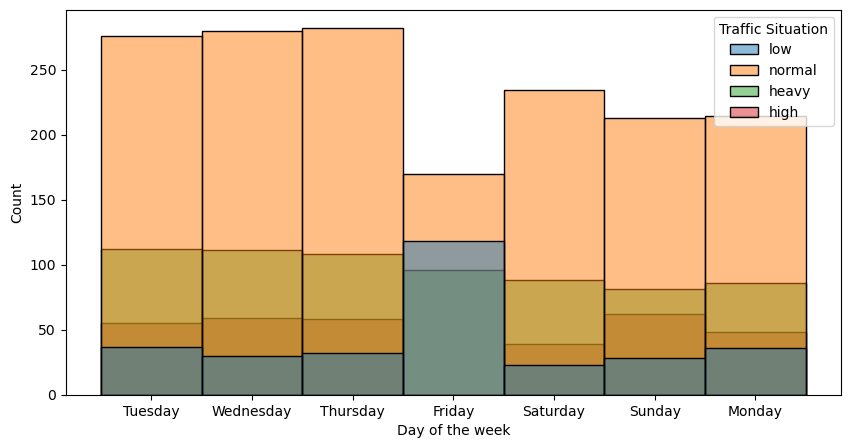

In [7]:
#['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       #'TruckCount', 'Total', 'Traffic Situation']
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Date', ylabel='Count'>

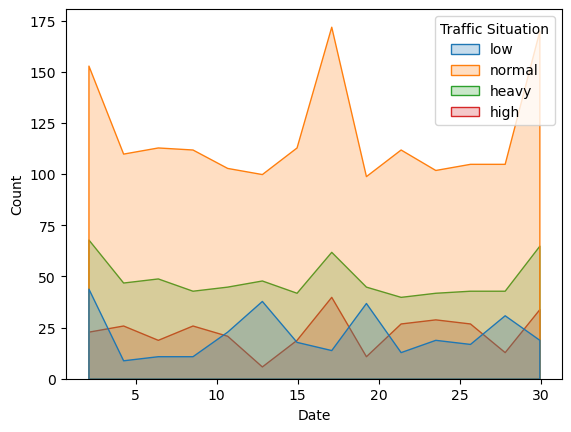

In [8]:
sns.histplot(df, x="Date", hue="Traffic Situation", element="poly")

<Axes: xlabel='Total', ylabel='Count'>

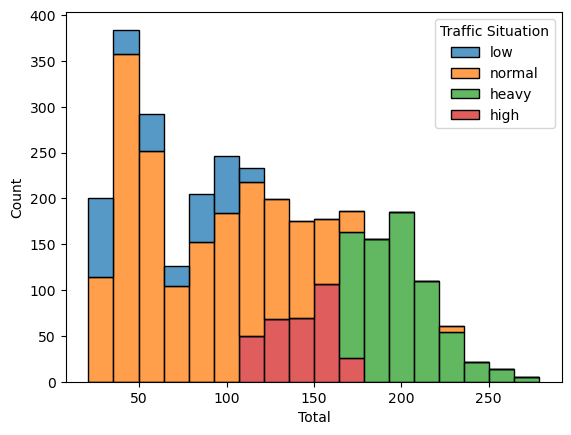

In [9]:
sns.histplot(data=df, x="Total", hue="Traffic Situation", multiple="stack")

features engineering

In [10]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [11]:
df['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [12]:
#Converting target variable 'Traffic Situation' into Numeric form
df['Traffic Situation'] = df['Traffic Situation'].replace({'low':0, 'normal':1, 
                                                              'heavy':2, 'high':3})

In [13]:
df['Day of the week'].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: Day of the week, dtype: int64

In [14]:
#Converting Days of weak into Numeric form
df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

In [15]:
#Extracting Specific time-related information from 'Time(24:00 am/pm)' column

df['hour'] = pd.to_datetime(df['Time']).dt.hour #Hour in separate column
df['minute'] = pd.to_datetime(df['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

df['Temp'] = df['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
df['AM/PM'] = df['Temp'].replace({'AM':0,'PM':1})

In [16]:
#Now remove 'Temp' and 'Time' columns
df= df.drop(columns = ['Time','Temp'], axis=1)
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,31,0,4,4,39,0,0,0,0
1,10,2,49,0,3,3,55,0,0,15,0
2,10,2,46,0,3,6,55,0,0,30,0
3,10,2,51,0,2,5,58,0,0,45,0
4,10,2,57,6,15,16,94,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,1,22,45,1
2972,9,4,11,0,1,30,42,1,23,0,1
2973,9,4,15,4,1,25,45,1,23,15,1
2974,9,4,16,5,0,27,48,1,23,30,1


In [17]:
df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM,Traffic Situation
Date,1.000000e+00,-1.672874e-02,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,2.814316e-16,2.865092e-17,6.563367e-17,0.006594
Day of the week,-1.672874e-02,1.000000e+00,-0.002230,0.063583,-0.046031,-0.021895,-0.002953,-2.874150e-16,-5.201713e-17,-1.206884e-16,-0.024423
CarCount,-1.345292e-02,-2.230275e-03,1.000000,0.722539,0.692994,-0.628157,0.970443,1.480863e-01,-3.359952e-03,1.026836e-01,0.541331
BikeCount,-5.088914e-03,6.358283e-02,0.722539,1.000000,0.566364,-0.575399,0.797429,1.405488e-01,-7.978481e-03,1.404737e-01,0.407324
BusCount,-1.553604e-02,-4.603119e-02,0.692994,0.566364,1.000000,-0.546931,0.790705,1.657507e-01,-1.615958e-02,1.209151e-01,0.590153
TruckCount,2.473362e-02,-2.189502e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,-1.695231e-02,-1.119745e-03,9.508203e-05,-0.049809
Total,-1.067861e-02,-2.952752e-03,0.970443,0.797429,0.790705,-0.555471,1.000000,1.793136e-01,-8.310162e-03,1.370317e-01,0.631150
hour,2.814316e-16,-2.874150e-16,0.148086,0.140549,0.165751,-0.016952,0.179314,1.000000e+00,-1.003662e-17,8.667781e-01,0.175062
minute,2.865092e-17,-5.201713e-17,-0.003360,-0.007978,-0.016160,-0.001120,-0.008310,-1.003662e-17,1.000000e+00,-6.691275e-18,0.002993
AM/PM,6.563367e-17,-1.206884e-16,0.102684,0.140474,0.120915,0.000095,0.137032,8.667781e-01,-6.691275e-18,1.000000e+00,0.124653


<Axes: >

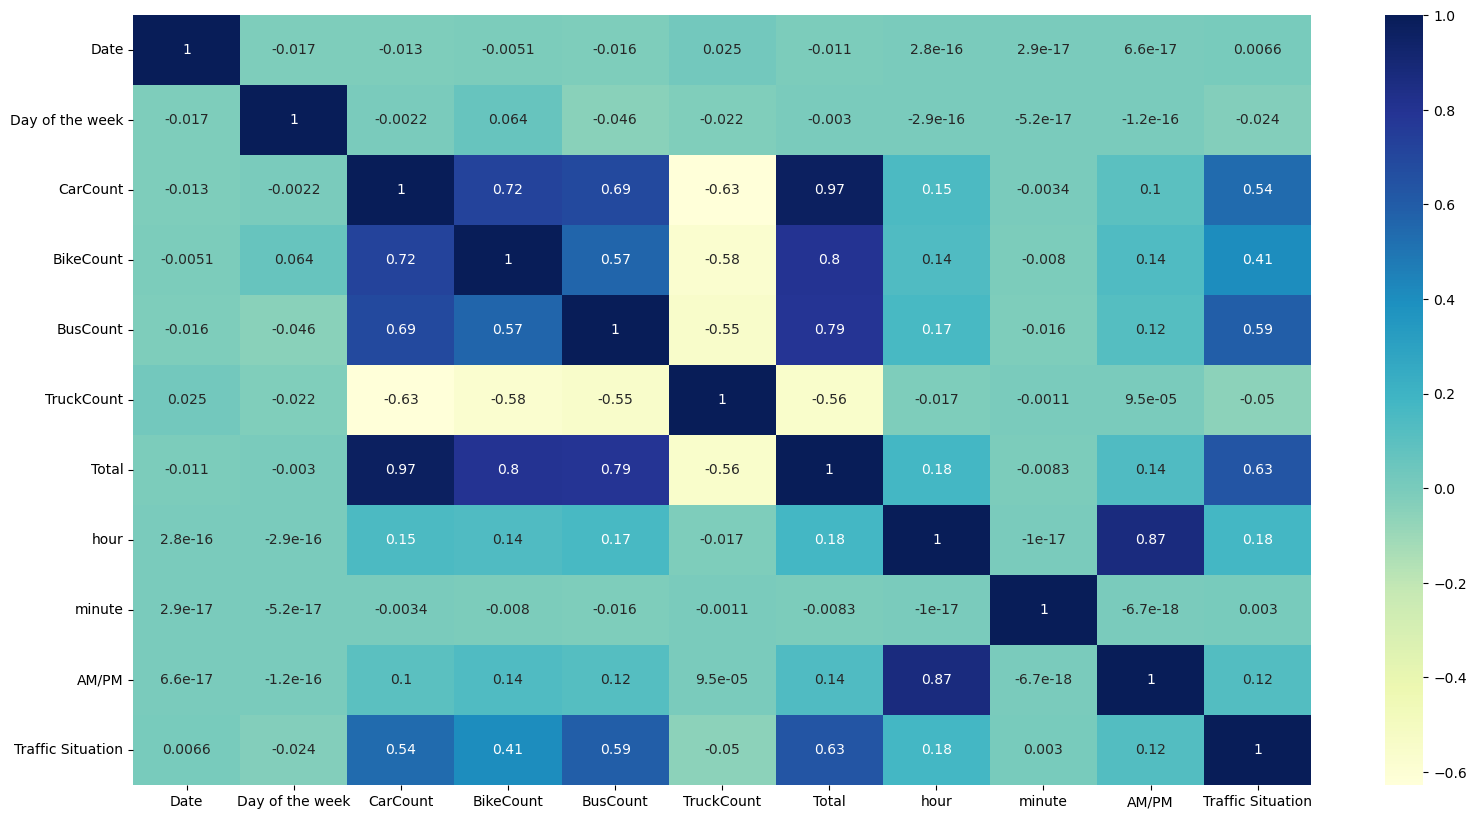

In [18]:
plt.figure(figsize = (19,10))
sns.heatmap(df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr(),
            cmap="YlGnBu",annot=True)

In [19]:
df.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM'],
      dtype='object')

In [20]:
X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= df['Traffic Situation'].values

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3 , random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
%%time
lr = LogisticRegression()
lr.fit(train_X,train_y)
y_test_pred = lr.predict(test_X)
acc_score = accuracy_score(test_y,y_test_pred)
acc_score

CPU times: total: 172 ms
Wall time: 63.6 ms


0.8734602463605823

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
%%time
dtc = DecisionTreeClassifier(random_state=0,max_depth=4)
dtc.fit(train_X,train_y)
y_test_pred = dtc.predict(test_X)
acc_score = accuracy_score(test_y,y_test_pred)
acc_score

CPU times: total: 0 ns
Wall time: 5.13 ms


0.975363941769317

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
%%time
rfc = RandomForestClassifier(n_estimators=50,random_state=0,max_depth=4)
rfc.fit(train_X,train_y)
y_test_pred = rfc.predict(test_X)
acc_score = accuracy_score(test_y,y_test_pred)
acc_score

CPU times: total: 531 ms
Wall time: 116 ms


0.9440089585666294

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
%%time
knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn.fit(train_X,train_y)
y_test_pred = knn.predict(test_X)
acc_score = accuracy_score(test_y,y_test_pred)

CPU times: total: 15.6 ms
Wall time: 21.1 ms


In [31]:
from sklearn.svm import SVC

In [32]:
%%time
svc = SVC(kernel='poly',degree=3,coef0=1)
svc.fit(train_X,train_y)
y_test_pred = svc.predict(test_X)
acc_score = accuracy_score(test_y,y_test_pred)
acc_score

CPU times: total: 31.2 ms
Wall time: 61 ms


0.9238521836506159

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy

In [34]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [35]:
model = Sequential([
    Dense(units=16, input_shape=(10,), activation='relu'),
    Dense(units=4, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
%%time
model.fit(x=train_X, y=train_y, validation_split=0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
167/167 - 2s - loss: 1.0638 - accuracy: 0.5660 - val_loss: 0.8225 - val_accuracy: 0.6930 - 2s/epoch - 9ms/step
Epoch 2/30
167/167 - 0s - loss: 0.7574 - accuracy: 0.7389 - val_loss: 0.6756 - val_accuracy: 0.7746 - 471ms/epoch - 3ms/step
Epoch 3/30
167/167 - 0s - loss: 0.6459 - accuracy: 0.7803 - val_loss: 0.5933 - val_accuracy: 0.8010 - 435ms/epoch - 3ms/step
Epoch 4/30
167/167 - 0s - loss: 0.5687 - accuracy: 0.7911 - val_loss: 0.5315 - val_accuracy: 0.8106 - 440ms/epoch - 3ms/step
Epoch 5/30
167/167 - 0s - loss: 0.5059 - accuracy: 0.8073 - val_loss: 0.4802 - val_accuracy: 0.8249 - 443ms/epoch - 3ms/step
Epoch 6/30
167/167 - 0s - loss: 0.4517 - accuracy: 0.8271 - val_loss: 0.4362 - val_accuracy: 0.8441 - 423ms/epoch - 3ms/step
Epoch 7/30
167/167 - 0s - loss: 0.4062 - accuracy: 0.8469 - val_loss: 0.4006 - val_accuracy: 0.8705 - 430ms/epoch - 3ms/step
Epoch 8/30
167/167 - 0s - loss: 0.3700 - accuracy: 0.8691 - val_loss: 0.3746 - val_accuracy: 0.8873 - 432ms/epoch - 3ms/step
Epo

In [39]:
y_test_pred = model.predict(test_X)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
acc_score = accuracy_score(test_y,y_test_pred_classes)
acc_score

28/28 [==============================] - 0s 1ms/step


0.9182530795072789

In [40]:
dnn = Sequential([
    Dense(units=16, input_shape=(10,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=48, activation='relu'),
    Dense(units=4, activation='softmax')
])

In [41]:
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                176       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 48)                1584      
                                                                 
 dense_5 (Dense)             (None, 4)                 196       
                                                                 
Total params: 2,500
Trainable params: 2,500
Non-trainable params: 0
_________________________________________________________________


In [42]:
dnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
%%time
dnn.fit(x=train_X, y=train_y, validation_split=0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
167/167 - 1s - loss: 0.8331 - accuracy: 0.7005 - val_loss: 0.5552 - val_accuracy: 0.7866 - 977ms/epoch - 6ms/step
Epoch 2/30
167/167 - 1s - loss: 0.4749 - accuracy: 0.8013 - val_loss: 0.3776 - val_accuracy: 0.8705 - 564ms/epoch - 3ms/step
Epoch 3/30
167/167 - 1s - loss: 0.3254 - accuracy: 0.8764 - val_loss: 0.3227 - val_accuracy: 0.8945 - 542ms/epoch - 3ms/step
Epoch 4/30
167/167 - 1s - loss: 0.2634 - accuracy: 0.8998 - val_loss: 0.2925 - val_accuracy: 0.8969 - 579ms/epoch - 3ms/step
Epoch 5/30
167/167 - 1s - loss: 0.2377 - accuracy: 0.9094 - val_loss: 0.2652 - val_accuracy: 0.9113 - 544ms/epoch - 3ms/step
Epoch 6/30
167/167 - 1s - loss: 0.2054 - accuracy: 0.9220 - val_loss: 0.2562 - val_accuracy: 0.9209 - 516ms/epoch - 3ms/step
Epoch 7/30
167/167 - 1s - loss: 0.1946 - accuracy: 0.9256 - val_loss: 0.2725 - val_accuracy: 0.9089 - 524ms/epoch - 3ms/step
Epoch 8/30
167/167 - 1s - loss: 0.1686 - accuracy: 0.9376 - val_loss: 0.2310 - val_accuracy: 0.9281 - 585ms/epoch - 4ms/step


In [44]:
y_test_pred = dnn.predict(test_X)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
acc_score = accuracy_score(test_y,y_test_pred_classes)
acc_score

28/28 [==============================] - 0s 1ms/step


0.93505039193729